## Nombres:
* Paulina Chalco
* Josue Sauca

### Fecha: 09-05-2024

# Ejercicio de Regresión Lineal

En este notebook intentaremos predecir cuántas veces será compartido en Redes Sociales un artículo de Machine Learning segun algunas de sus características

## Predicción: ¿Cuántas veces será compartido un artículo del Blog?

Vamos a comenzar por Importar y Visualizar los datos

In [ ]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#cargamos los datos de entrada
data = pd.read_csv("./datascience_salaries.csv")

In [ ]:
#veamos cuantas dimensiones y registros contiene
data.shape

(1171, 7)

In [ ]:
#Observamos las cabecera del dataset con sus respectivos nombres de la columna
data.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [ ]:
"""
  En este caso se va a proceder a eliminar la primera columna ya que simplemente es
  un identificador que lo pusieron en el dataset y no es relevante para el estudio que se va a hacer
"""
data = data.drop('Unnamed: 0', axis=1)

In [ ]:
"""
  Contamos los valores de la columna job_title y como se puede observar
  las clases cuentan con una dispersion bastante pareja.
"""
data['job_title'].value_counts()

job_title
Data scientist      394
Data analyst        368
Machine learning    289
Big data            101
ML Ops               19
Name: count, dtype: int64

In [ ]:
"""
  En este caso como se va a realizar una estudio de regresion lineal
  se va a proceder a realizar una transformacion de los datos ya que
  se tiene algunos incoveninetes a la hora de trabajar con variables
  categoricas.

  'Data scientist' : 1,
  'Data analyst' : 2,
  'Machine learning' : 3,
  'Big data' : 4,
  'ML Ops' : 5
"""

data['job_title'] = data['job_title'].replace(
    {
      'Data scientist' : 1,
      'Data analyst' : 2,
      'Machine learning' : 3,
      'Big data' : 4,
      'ML Ops' : 5
    }
)

In [ ]:
#Contamos los valores de la experiencia de trabajo que tienen
#las personas del dataset
data['experience_level'].value_counts()

experience_level
Senior       727
Mid          305
Entry        126
Executive     13
Name: count, dtype: int64

In [ ]:
"""
Tranformamos dichos datos para trabajar con variables numericas
en vez de categoricas.

  'Senior' : 1,
  'Mid' : 2,
  'Entry' : 3,
  'Executive' : 4
"""

data['experience_level'] = data['experience_level'].replace(
    {
        'Senior' : 1,
        'Mid' : 2,
        'Entry' : 3,
        'Executive' : 4
    }
)

In [ ]:
#Se cuenta el tipo de trabajo que tiene
#ya sea tiempo completo o parcial
data['job_type'].value_counts()

job_type
Full Time     1136
Internship      35
Name: count, dtype: int64

In [ ]:
"""
  Se realiza su respectiva transformacion para trabajar
  con dichos datos.
  'Full Time' : 1,
  'Internship' : 2
"""

data['job_type'] = data['job_type'].replace(
    {
      'Full Time' : 1,
      'Internship' : 2
    }
)

In [ ]:
"""
  Al momento de usar la funcion describe se puede observar que
  se puede obtener algunos de los valores como moda, media, mediana, etc
  los cuales pueden ser unicamente obtenidos con variables numericas,
  por eso se realizo la transformacion anterior, ya que si se continuaba
  de esa manera no se iba a poder realizar dichos calculos.
"""
data.describe()

,job_title,job_type,experience_level,salary
count,1171.000000,1171.000000,1171.000000,1171.000000
mean,2.131512,1.029889,1.508967,64836.037575
std,1.028544,0.170354,0.729510,32551.767046
min,1.000000,1.000000,1.000000,30000.000000
25%,1.000000,1.000000,1.000000,45000.000000
50%,2.000000,1.000000,1.000000,63000.000000
75%,3.000000,1.000000,2.000000,68000.000000
max,5.000000,2.000000,4.000000,228000.000000


## Visualización General

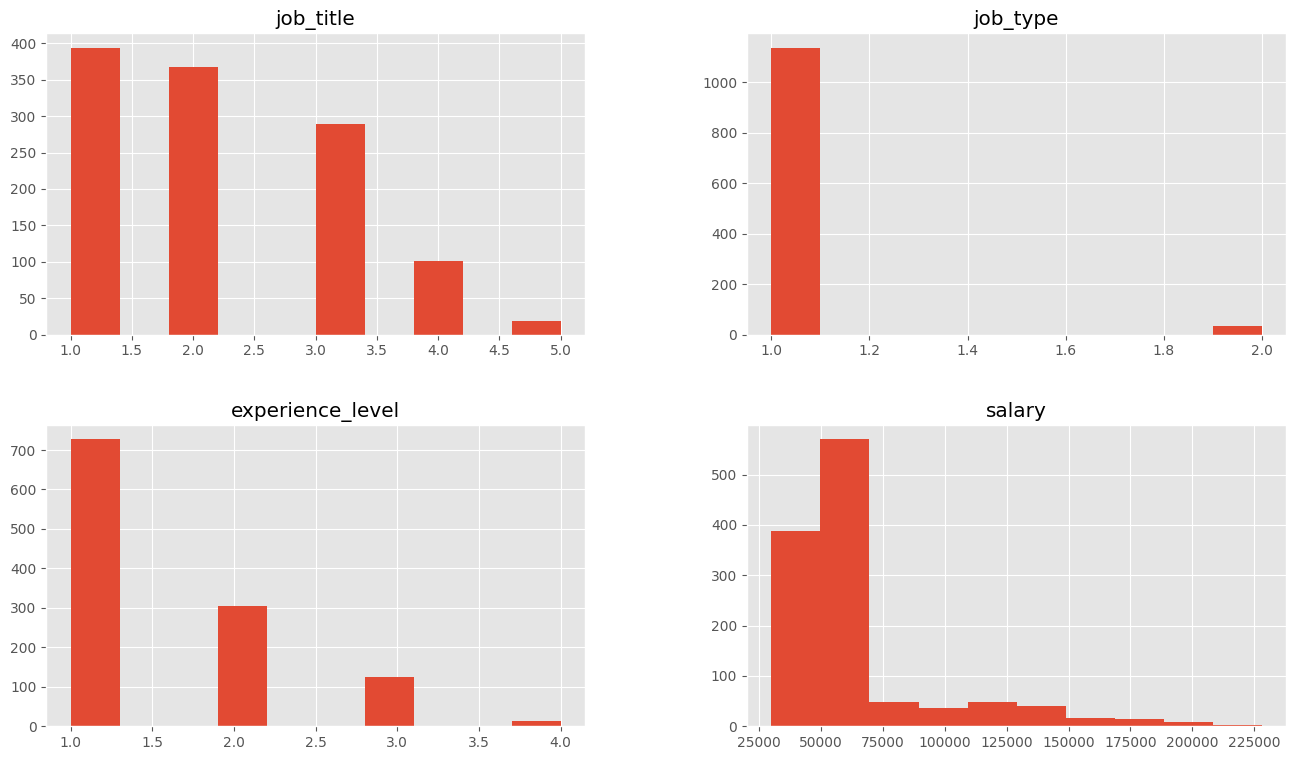

In [ ]:
"""
  Se visualiza de manera general algunas de las variables,
  previamente transformadas, otro punto importante de realizar
  dichas transformaciones era el poder visualizarlas mediante
  gráficas, ya que en el parámetro incluye se le indica que se
  presenten variables de tipo numéricas ya que si se trata de visualizar
  variables categóricas se presenta inconvenientes al no poder
  medir datos para poder presentarlos.

"""
data.select_dtypes(include=['int', 'float']).hist()
plt.show()

In [ ]:
data['job_title'].value_counts()

job_title
1    394
2    368
3    289
4    101
5     19
Name: count, dtype: int64

In [ ]:
data['salary_currency'].value_counts()

salary_currency
USD    1157
EUR       9
GBP       5
Name: count, dtype: int64

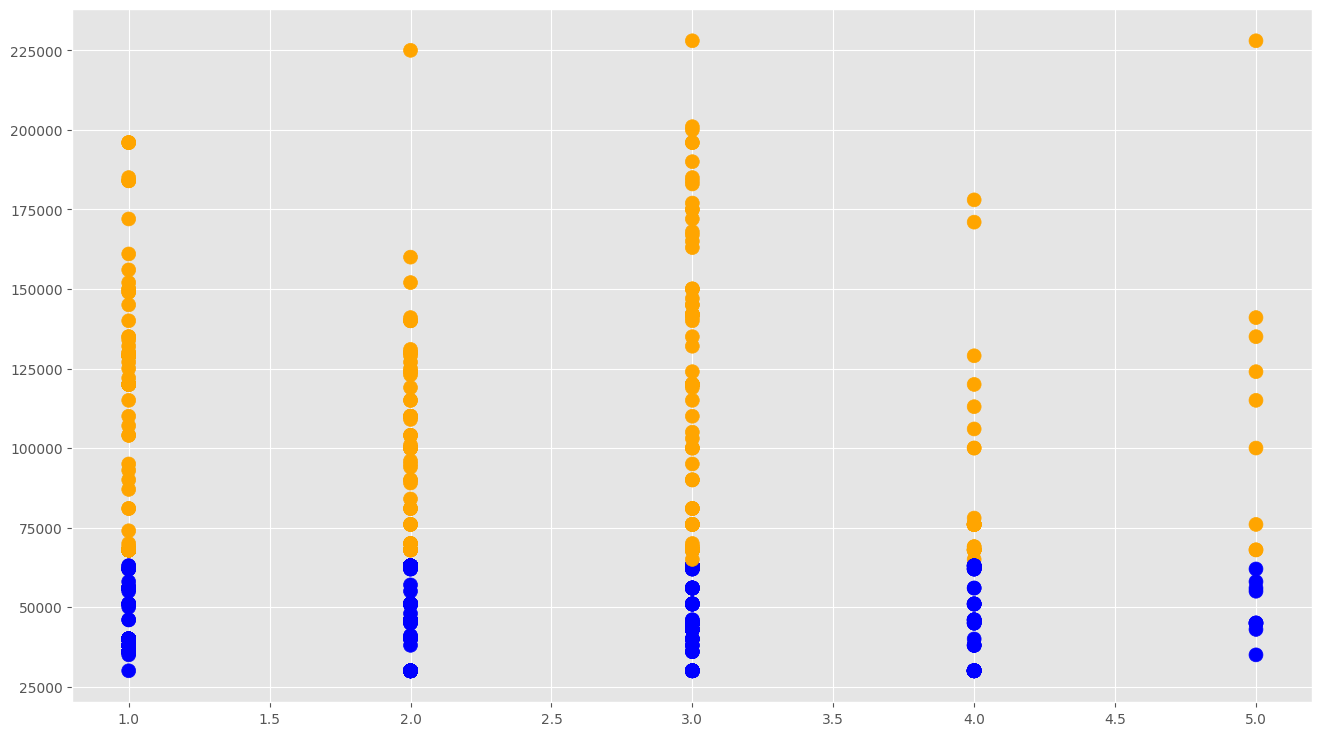

In [ ]:
#vamos a Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[100,200] #Es el tamaño del grosor de los puntos de la grafica

f1 = data['job_title'].values
f2 = data['salary'].values

asignar=[]
for index, row in data.iterrows():
    #En esta condicional se pintan los salarios que esten encima de la media
    #de los salarios de un color y otro los que no esten
    if(row['salary']>64000):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

## Visualizamos la Recta que obtuvimos

In [ ]:
data['job_title'].value_counts()

job_title
1    394
2    368
3    289
4    101
5     19
Name: count, dtype: int64

In [ ]:
f1 = data['job_title'].values
f2 = data['salary'].values

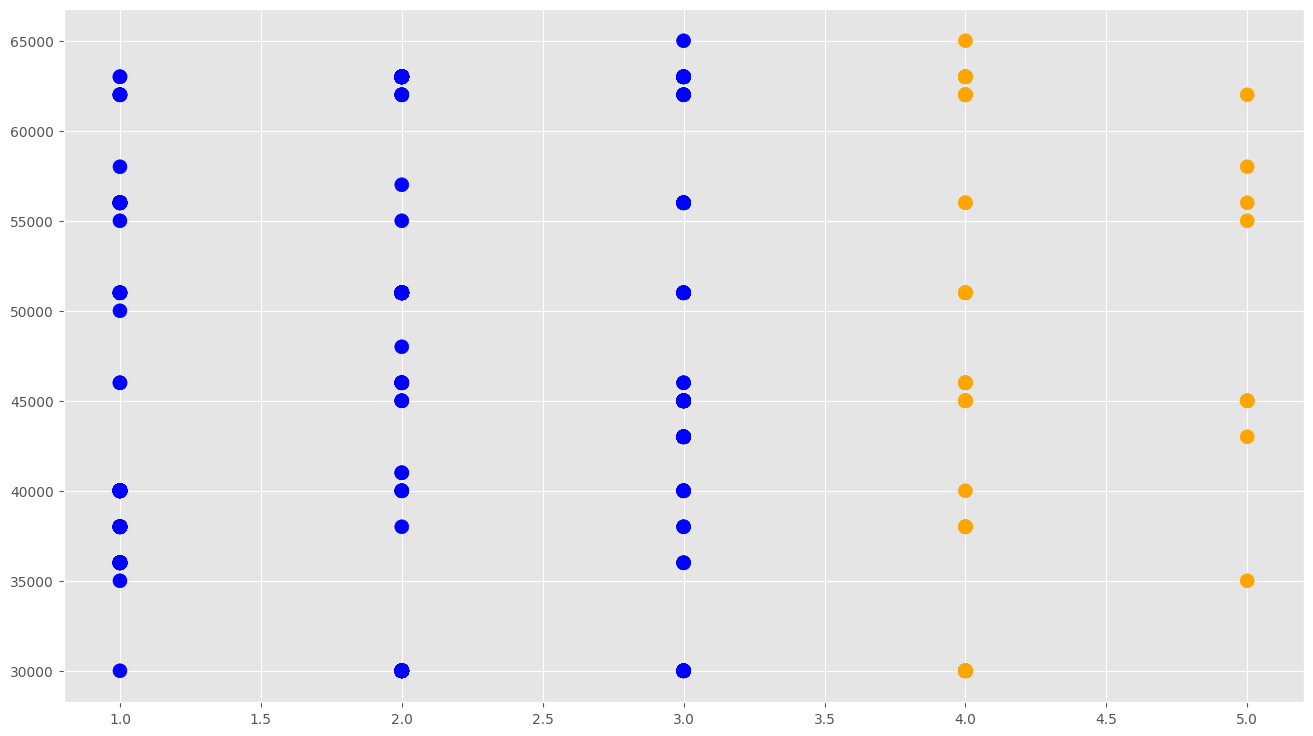

In [ ]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# en este caso se va a tomar la media de los dos variables a evaluar como
# el sueldo y el titulo de trabajo para hacer la comparativa
# en este caso se va a tomar en cuenta todos los trabajos, pero el sueldo
# se lo va a tomar en la media del mismo y se lo almacena en la variable
# filtered_data
filtered_data = data[(data['job_title'] <= 5) & (data['salary'] <= 65000)]

f1 = filtered_data['job_title'].values
f2 = filtered_data['salary'].values

"""
  'Data scientist' : 1,
  'Data analyst' : 2,
  'Machine learning' : 3,
  'Big data' : 4,
  'ML Ops' : 5
"""

asignar=[]
for index, row in filtered_data.iterrows():
    #Se va a pintar los 3 primeros trabajos de un color
    #y los dos ultimos de otro color
    if(row['job_title']>3):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

## Regresión Lineal Simple (1 variable)

Vamos a intentar primero una Regresión Lineal con 1 sóla variable

In [ ]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["job_title"]]
X_train = np.array(dataX)
y_train = filtered_data['salary'].values

In [ ]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-65.43595005]
Independent term: 
 47896.47996292956
Mean squared error: 128887672.95
Variance score: 0.00


* Como se puede observar se tiene un valor de -65.43595005 en los coeficientes, en este caso se lo puede interpretar como que existen
algunos trabajos mejor pagados que otros por eso existe cierta diferencia
y esto va segun el cargo que ocupan ya que hay algunos trabajos que pagan mejor
que otros.
* En este caso el termino independiente es la suma de dinero que está representada en la variable de y_train, el valor de 47896, es el valor que indica que cuando un trabajo sea exigente que otro va a tender a ganar cerca de
ese sueldo.
* En este caso el valor de Mean squared error: 128887672.95, tiende a ser bastante alto y esto indica que el modelo no está haciendo bien sus predicciones ya que para identificar si un trabajo es mejor pagado que otro depende de muchas variables, como en qué empresa trabaja, de que trabaja, si es en sector público o privado, por ende, se puede deducir que no se obtiene una buena predicción debido a dichas características.
* Finalmente se obtuvo el valor de Variance score: 0.00, el cual indica que el modelo no tiene variabilidad en sus datos ya que al momento del entrenamiento los datos fueron de un rango especifico y dicha configuración influyo en la salida de los datos.

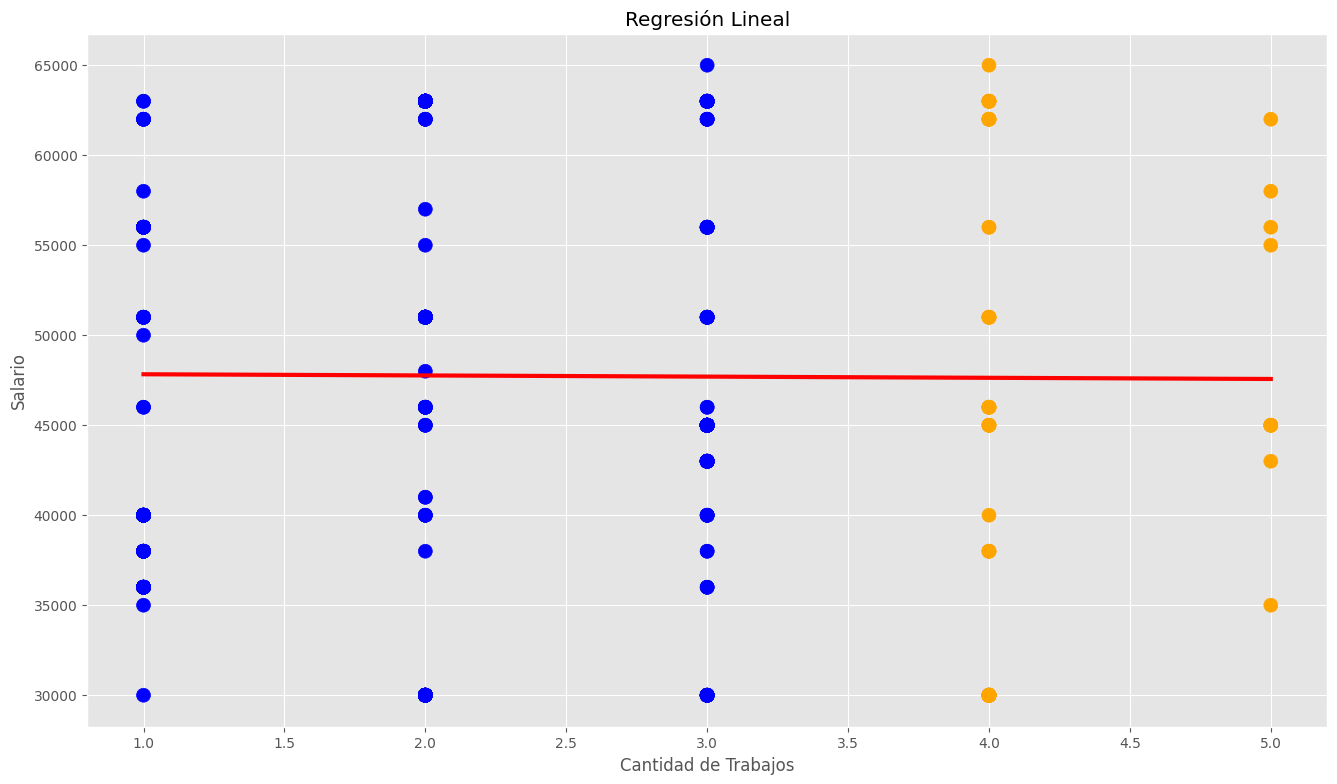

In [ ]:
"""
  Como se puede observar al momento de graficar la linea para ver
  la varianza no se puede ver mayor novedad, ya que al momento de
  entrenar el modelo se tomo una media de datos para poder hacer el
  respectivo analisis y los valores estan igualos y por ende la variance
  score no presenta mayores cambios en las variables ya que todo esta
  balanceado.
"""
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Trabajos')
plt.ylabel('Salario')
plt.title('Regresión Lineal')

plt.show()

In [ ]:
# Veamos como cambian los valores una vez filtrados
filtered_data.describe()

,job_title,job_type,experience_level,salary
count,734.000000,734.000000,734.000000,734.000000
mean,2.269755,1.042234,1.745232,47747.956403
std,0.947884,0.201260,0.767127,11360.781486
min,1.000000,1.000000,1.000000,30000.000000
25%,2.000000,1.000000,1.000000,40000.000000
50%,2.000000,1.000000,2.000000,45000.000000
75%,3.000000,1.000000,2.000000,62000.000000
max,5.000000,2.000000,4.000000,65000.000000


### Predicción 1

In [ ]:
y_Dosmil = regr.predict([[500]])
print(int(y_Dosmil))

15178


<ipython-input-45-133b3c26b58e>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(y_Dosmil))


Se realizo una predicción con el modelo entrenado donde se le indica
que cuantas personas ganan más que 500 dólares y el algoritmo nos arroja
que alrededor de 15178 personas ganan más que ese sueldo.


In [ ]:
y_Dosmil = regr.predict([[70000]])
print(int(y_Dosmil))

-4532620


<ipython-input-46-bea978fa302a>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(y_Dosmil))


En este caso si se le predice sobre cuantas personas ganan más de $70.000

se puede ver un evidente error ya que el algoritmo no tiene sueldos sobre $65000 y por ende da errores negativos que no concuerdan con los valores reales